In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('file_name.csv')
df

,Unnamed: 0,authors,title of paper,journal name,citations,doi,page no,month of publication,year of publication,ISSN,url,Journal_encoded
0,0,"Andrija Goranović, Marcus Meisel, Stefan Wilke...",Hyperledger Fabric Smart Grid Communication Te...,IEEE Conference Publication,5.0,10.1109/WFCS.2019.8758000,27-29 May 2019,July,2019.0,1882-2161.0,https://ieeexplore.ieee.org/abstract/document/...,2
1,1,"Obaidur Rahman, Kashem M. Muttaqi, Danny Sutanto",Three Phase Power Flow Analysis of Distributio...,IEEE Conference Publication,163.0,10.1109/AUPEC.2018.8758001,27-30 Nov. 2018,July,2019.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,2
2,2,"Shiva Azimi, Brejesh Lall, Tapan K. Gandhi",Performance Evalution of 3D Keypoint Detectors...,IEEE Conference Publication,6.0,10.23919/MVA.2019.8758002,27-31 May 2019,July,2019.0,1882-0927.0,https://ieeexplore.ieee.org/abstract/document/...,2
3,3,"S.A Syed Mustaffa, I. Musirin, M.M. Othman, M....",Location and Sizing of Distributed Generation ...,IEEE Conference Publication,42.0,10.1109/AUPEC.2018.8758003,27-30 Nov. 2018,July,2019.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,2
4,4,"Philip Tobianto Daely, Dong-Seong Kim",Bio-Inspired Cooperative Localization in Indus...,IEEE Conference Publication,3.0,10.1109/WFCS.2019.8758004,27-29 May 2019,July,2019.0,1882-2141.0,https://ieeexplore.ieee.org/abstract/document/...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
504,645,"Fortino Mendoza-Mondragón, Víctor Manuel Herná...",Robust Speed Control of Permanent Magnet Synch...,IEEE Journals & Magazine,48.0,10.1109/TIE.2017.2786203,6099 - 6108,January,2018.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,3
505,646,"Andreas Andersson, Torbjörn Thiringer",Motion Sensorless IPMSM Control Using Linear M...,IEEE Journals & Magazine,38.0,10.1109/TTE.2018.2790709,464 - 473,January,2018.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,3
506,647,"Hao Wu, Wei Wang",A Game Theory Based Collaborative Security Det...,IEEE Journals & Magazine,42.0,10.1109/TIFS.2018.2790382,1432 - 1445,January,2018.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,3
507,648,"Pengzhan Wang, Hongli Xu, Liusheng Huang, Chen...",Minimizing Controller Response Time Through Fl...,IEEE Journals & Magazine,23.0,10.1109/TNET.2017.2786268,562 - 575,January,2018.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,3


In [ ]:
df.shape

(509, 12)

In [ ]:
df.dtypes

Unnamed: 0                int64
authors                  object
title of paper           object
journal name             object
citations               float64
doi                      object
page no                  object
month of publication     object
year of publication     float64
ISSN                     object
url                      object
Journal_encoded           int64
dtype: object

Checking For Missing Values

In [ ]:
df.isnull().sum()

Unnamed: 0              0
authors                 0
title of paper          0
journal name            0
citations               0
doi                     0
page no                 0
month of publication    0
year of publication     0
ISSN                    0
url                     0
Journal_encoded         0
dtype: int64

Label Encoding on Journal Name

In [ ]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
df['Journal_encoded']= label_encoder.fit_transform(df['journal name'])

Correlation Analysis on Journal Name and Number of citations

Text(0, 0.5, 'Citations')

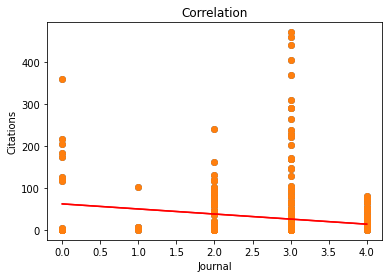

In [ ]:
import matplotlib.pyplot as plt
x=df['Journal_encoded']
y=df['citations']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.title('Correlation')

plt.scatter(x, y)
  
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
  

plt.xlabel('Journal')
plt.ylabel('Citations')


Fixing Data consistency in ISSN column

In [ ]:
rows=df.shape[0]

temp=[]

for i in df['ISSN']:
    if '-' not in i:
       temp.append(i[:4]+'-'+i[4:])
    else:
       temp.append(i) 

df['ISSN']=temp

Data Transformation in Date column

In [ ]:
# removed the date part
temp_pageno = df["page no"] 
dummy=[]
for x in temp_pageno:
  z = x
  t = z.replace(" ", "")
  e = ""
  for i in t:
    if i >='A' and i<='Z':
      break
    else:
      e += str(i)
   #print(e)
  dummy.append(e)

In [ ]:
df['page no']=dummy

In [ ]:
df.head()

,Unnamed: 0,authors,title of paper,journal name,citations,doi,page no,month of publication,year of publication,ISSN,url,Journal_encoded
0,0,"Andrija Goranović, Marcus Meisel, Stefan Wilke...",Hyperledger Fabric Smart Grid Communication Te...,IEEE Conference Publication,5.0,10.1109/WFCS.2019.8758000,27-29,July,2019.0,1882-2161.0,https://ieeexplore.ieee.org/abstract/document/...,2
1,1,"Obaidur Rahman, Kashem M. Muttaqi, Danny Sutanto",Three Phase Power Flow Analysis of Distributio...,IEEE Conference Publication,163.0,10.1109/AUPEC.2018.8758001,27-30,July,2019.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,2
2,2,"Shiva Azimi, Brejesh Lall, Tapan K. Gandhi",Performance Evalution of 3D Keypoint Detectors...,IEEE Conference Publication,6.0,10.23919/MVA.2019.8758002,27-31,July,2019.0,1882-0927.0,https://ieeexplore.ieee.org/abstract/document/...,2
3,3,"S.A Syed Mustaffa, I. Musirin, M.M. Othman, M....",Location and Sizing of Distributed Generation ...,IEEE Conference Publication,42.0,10.1109/AUPEC.2018.8758003,27-30,July,2019.0,2169-3536,https://ieeexplore.ieee.org/abstract/document/...,2
4,4,"Philip Tobianto Daely, Dong-Seong Kim",Bio-Inspired Cooperative Localization in Indus...,IEEE Conference Publication,3.0,10.1109/WFCS.2019.8758004,27-29,July,2019.0,1882-2141.0,https://ieeexplore.ieee.org/abstract/document/...,2


In [ ]:
df['journal name'].unique()

array(['IEEE Conference Publication', 'BIAI Journals & Magazine',
       'IEEE Journals & Magazine', 'IET Journals & Magazine',
       'CPSS Journals & Magazine'], dtype=object)

Data Visualization 

5


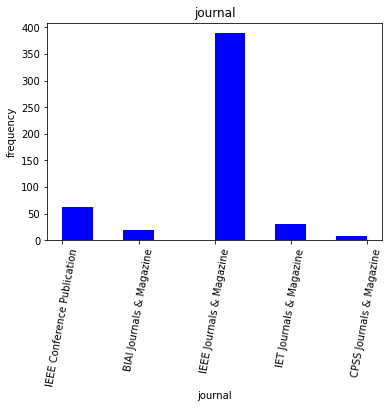

In [ ]:
plt.hist(df['journal name'],color='blue',orientation='vertical')
plt.title('journal')
plt.xlabel('journal')
plt.ylabel('frequency')
journal=('IEEE Conference Publication', 'BIAI Journals & Magazine',
       'IEEE Journals & Magazine', 'IET Journals & Magazine',
       'CPSS Journals & Magazine')

print(len(journal))
index=np.arange(len(journal))
plt.xticks(index,journal,rotation=80)
plt.show()

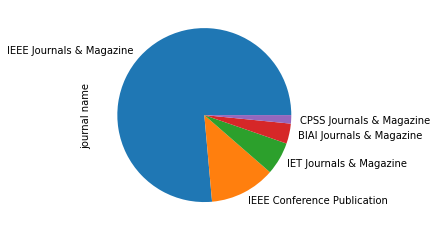

In [ ]:
df['journal name'].value_counts()[:20].plot(kind='pie')

In [ ]:
month=df['month of publication'].value_counts()

<BarContainer object of 2 artists>

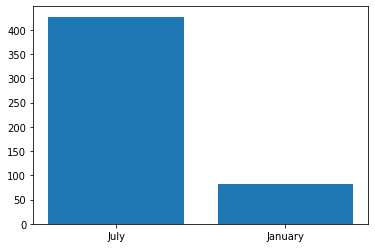

In [ ]:
plt.bar(month.index,[month[0],month[1]])

In [ ]:
df.sort_values(by='citations',ascending=False)[['title of paper','citations']][:5]


,title of paper,citations
410,A Fault-Tolerant Wideband Amplifier Based on D...,471.0
123,A Simulation Framework for Virtualized Resourc...,459.0
128,Contract Management: Being Agile,440.0
120,A Stabilizing Centralized Controller for On-Ch...,406.0
84,Deep Segmentation Domain Adaptation Network Wi...,370.0


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

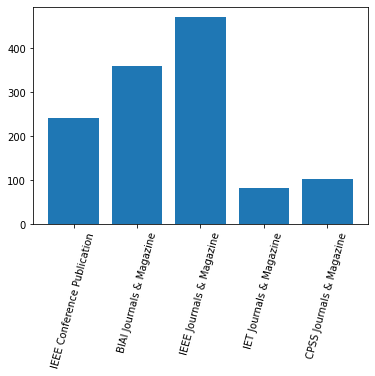

In [ ]:
plt.bar(df['journal name'],df['citations'])
plt.xticks(rotation=75)